In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_players = 150
data = {
    'PTS': np.random.normal(12, 6, n_players),
    'AST': np.random.normal(3, 2, n_players),
    'TRB': np.random.normal(5, 2.5, n_players),
    'STL': np.random.normal(1, 0.5, n_players),
    'BLK': np.random.normal(0.8, 0.6, n_players),
    'TOV': np.random.normal(2, 1, n_players),
    'FG%': np.random.normal(0.45, 0.05, n_players),
    '3P%': np.random.normal(0.35, 0.07, n_players),
    'FT%': np.random.normal(0.75, 0.1, n_players)
}
df = pd.DataFrame(data)

df['FG%'] = df['FG%'].clip(0.3, 0.65)
df['3P%'] = df['3P%'].clip(0.2, 0.5)
df['FT%'] = df['FT%'].clip(0.5, 0.95)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


C:\Users\bjack\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bjack\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bjack\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bjack\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

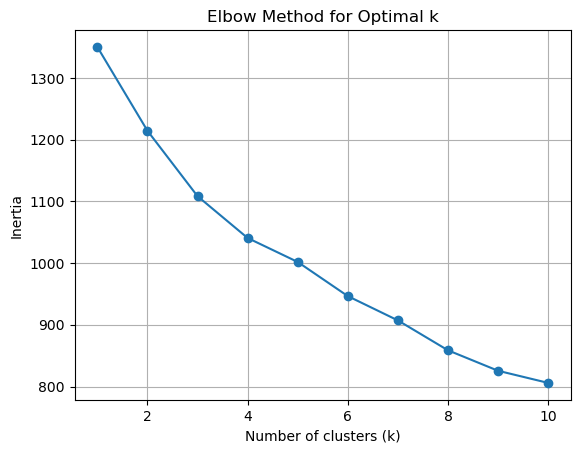

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [7]:
from sklearn.decomposition import PCA

optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

C:\Users\bjack\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


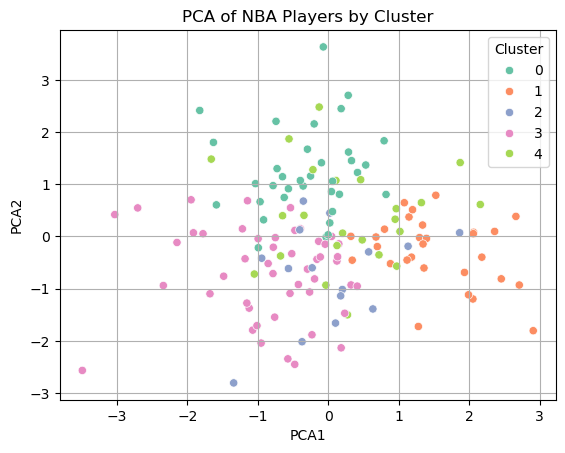

In [9]:
import seaborn as sns

plt.figure()
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('PCA of NBA Players by Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()